# Stack class

In [10]:
class Stack:
    def __init__(self):
        self.s = [] # 빈 리스트
    
    def push(self, item): # item을 스택에 추가하는 함수
        self.s.append(item)
        
    def isEmpty(self): # 비어 있는지 아닌지 확인하는 메소드
        return len(self.s) == 0 
    
    def pop(self): # 맨 위에 있는 친구 pop
        if self.isEmpty() == False:
            return self.s.pop()
        else:
            print("Already Empty")
            return None
    
    def size(self):
        return len(self.s)
            
    
    def peek(self):
        return self.s[-1]
    
    def pprint(self):
        return self.s[:]
    
    def delete(self, item):
        self.s.remove(item)
    ### 이거 수정해야 할 필요가 있다.
    # def __str__(self):
    #     return f"Stack size is {len(self.s)}, and contetns", [_ for _ in self.s]
        

In [9]:
new_stack = Stack()
new_stack.push("tomato")
new_stack.push("banana")
new_stack.push("sauce")
new_stack.push("cheese")
new_stack.push("bread")

new_stack.print()

['tomato', 'banana', 'sauce', 'cheese', 'bread']

### Stack 응용문제

In [101]:
# string reverse 문제
string = "abcdefg"
s = Stack()

for _string in string:
    s.push(_string)

reverse_string = ""
while s.isEmpty() == False:
    reverse_string += s.pop()

reverse_string

'gfedcba'

In [11]:
# 수식 괄호 체크
# 수식에서 '('이면 push, ')'이면 pop함
# 수식 끝났을 때 스택 비어있으면 괄호가 정확한 것
def eqBraketCheck(f):
    s = Stack()
    for item in range(len(f)):
        if item == '(':
            s.push(item)
        elif item == ')':
            if s.pop() == None:
                return False # 제대로 뵈어있으면 처음 넣었떤 '('가 있어야 하는데 pop할게 없다면 잘못된 것
    if s.isEmpty() == True:
        return True
    else:
        return False
        
f = '(1+2) + (3+4) = '
eqBraketCheck(f)    

True

### 수식 후위표기 알고리즘(Postfix algorithm)

* 수식을 컴퓨터가 쉽게 계산할 수 있도록 바꾸는 알고리즘이다.
* 알고리즘을 수행하기 전에 빈 스택과 빈 리스트를 준비한다.
    * "(": item을 Stack에 push
    * ")": pop한 결과가 "(" 일 때까지 list append, pop 결과가 마지막 "(" 때는  append하지 않음
    * "+", "-": peek 한 결과가 연산자일 동안 pop한 결과를 list append, 연산자가 아니면 item을 push
    * "*", "/": peek 한 결과가 “*“, “/”일 동안 pop한 결과를 list append, 아니면 item을 push
    * "숫자": list append item
    * 수식이 끝나면 스택에 있는 것을 모두 pop하여 문자열에 추가

In [12]:
# 연산부 우선 순위 함수
def isOper(item):
    if item == '+' or item == '-':
        return 1
    elif item == '*' or item == '/':
        return 2
    elif item == '(' or item == ')':
        return 0
    else:
        return -1

isOper('A')

def isNum(s):
    res = True
    for char in s:
        if char != "." and (ord(char) < 48 or ord(char) > 57) :  # ascii code
                res = False
    return res

print(isNum("a"), isNum("0.12"))

False True


### Queue

In [27]:
class Queue:
    def __init__(self):
        self.q = []
    
    def isEmpty(self):
        return len(self.q) == 0
    
    def enQueue(self, item):
        self.q.append(item)
    
    def deQueue(self):
        return self.q.pop(0)
    
    def peek(self):
        return self.q[0]
    
    def pprint(self):
        return self.q

In [28]:
cafe = Queue()

cafe.enQueue('child')
cafe.enQueue('woman')
cafe.enQueue('old man')
cafe.enQueue('model')

cafe.pprint()
cafe.deQueue()
cafe.pprint()
cafe.peek()


'woman'

### Queue 응용문제
* 커피가게에 손님이 도착해서 커피를 사가지고 나가는 과정에서 커피를 주문해서 받는 시간까지를 Queue로 본다.
* Queue 길이가 길면 손님이 다른 가게로 이동하므로 Queue 길이를 너무 길지 않도록 관리하는 것이 중요하다.
* 커피가게 손님 도착간격을 확률변수 X 라고 하자.

$$ X \sim exp(\lambda) $$
$$ f(x) = \frac {1}{\lambda} exp(-\frac {x}{\lambda}), \ E(X) = \lambda, \ V(X)= \lambda^2$$



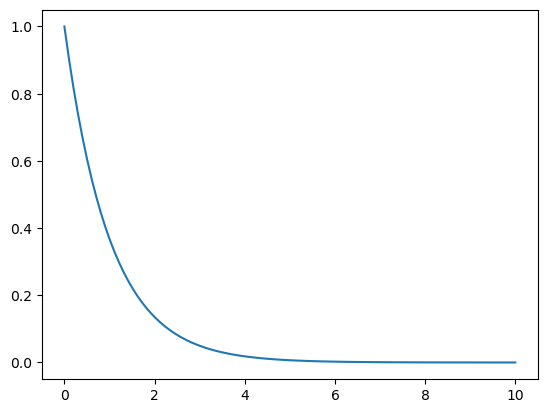

In [29]:
import numpy as np
import matplotlib.pyplot as plt
lamda = 1

# np.linspace(start, stop, num) : 시작~멈춤까지 num개수의 1차원 배열 만들어주는 함수
x = np.linspace(0, 10,100)
pdf = (1/lamda) * np.exp(-x/lamda)
plt.plot(x,pdf)
plt.show()

In [ ]:
# x는 한사람이 도착 후, 다음 고객이 도착하는 시간 사이 간격을 의미함
import numpy as np
np.random.seed(seed=1)
x = np.random.exponential(1, 10) # 람다=1인 난수 10개 생성
print(np.mean(x), np.std(x))

# np.cumsum(array, axis=) : 배열에서 주어진 축에 따라 원소들의 누적 합 계신
entTime = np.cumsum(x) # cummulative summation
print(entTime)

0.43389551257941206 0.35676829778886443
[0.53960584 1.81373109 1.81384547 2.17385823 2.33256782 2.42945169
 2.63556633 3.05954281 3.56499535 4.33895513]


In [30]:
entTime = 0
while entTime < 720:
    entTime += np.random.exponential(1, 1)[0]
    print(entTime, end=",")

0.02776962476842335,1.137849951265056,1.6779409977094852,2.4959483116125227,2.6472212311944583,2.8679944553111887,4.481162158151539,7.931389367861241,8.307427980770212,9.486131479213338,11.576748452427811,13.826804318400345,13.91568385171125,13.955521729833857,14.14164701511694,16.246549992977464,16.350075342287006,16.896714041811872,20.06417292101208,20.82595293425148,22.003209529151388,22.382298999321073,23.542257877346522,25.341801596773283,25.36025917194885,26.747130959527187,31.244441756228955,32.62342552250475,32.95254643533209,34.509768289400874,34.618719696351576,35.2127340602945,37.60519466173247,37.952788320467,38.29215020211475,38.43144511150281,38.45100206600672,39.586803994626905,39.82458936106691,40.13321817180655,40.809652118375105,40.864491212864245,41.71808325292121,41.87676083444738,42.76666657418263,43.969834236125806,44.077791931345246,44.612322967669044,45.79780170548377,46.33254316238655,46.38378746739103,47.15143495595329,48.24146808672246,48.964845865968776,51.8

In [31]:
np.random.seed(seed=1)
cookTime = np.random.normal(1, 0.2, 10)
cookTime = np.where(cookTime < 0, 0,cookTime)
cookTime

array([1.32486907, 0.87764872, 0.89436565, 0.78540628, 1.17308153,
       0.53969226, 1.34896235, 0.84775862, 1.06380782, 0.95012592])

커피큐
- custclass : arriveTime, orderTime, outTime
- shopclass : custQueue- getsize, entcust, outcust, getLast
- main program
    - curTime = 0~ 14*60 계속 반복
    - 고객 생성(도착시간 정의)
    - 큐 고객 없으면 orderTime = arriveTime
    - outTime = orderTime + cookTime
    - 고객 큐에 넣음
    - curTime -> arriveTime
    - curTime보다 outTime이 과거인 고객 deQueue

In [38]:
import random

class Cust:
    def __init__(self, arriveTime):
        self.arriveTime = arriveTime
        self.orderTime = 0
        self.outTime = 0
    
    def __str__(self):
        return f"Customer: arrive={self.arriveTime}, order={self.orderTime}, out={self.outTime}"


class Shop:
    def __init__(self):
        self.custQueue = []
    
    def getSize(self):
        return len(self.custQueue)
    
    def entCust(self, cust):
        self.custQueue.append(cust)
    
    def outCust(self, curTime):
        # Remove customers whose outTime is earlier than curTime
        i = 0
        while i < len(self.custQueue):
            if self.custQueue[i].outTime < curTime:
                print(f"Customer leaving at {curTime}: {self.custQueue[i]}")
                self.custQueue.pop(i)
            else:
                i += 1
    
    def getLast(self):
        if self.getSize() > 0:
            return self.custQueue[-1]
        return None


def main():
    # Create a coffee shop
    shop = Shop()
    
    # Start time is 8:00 (in minutes)
    curTime = 8 * 60
    endTime = 14 * 60  # 14:00 (in minutes)
    
    # Random customer arrival interval (between 1 and 15 minutes)
    
    # Simulation loop
    while curTime < endTime:
        # Generate new customer
        cust = Cust(curTime)
        
        # Determine order time
        if shop.getSize() == 0:
            cust.orderTime = cust.arriveTime
        else:
            lastCust = shop.getLast()
            cust.orderTime = max(cust.arriveTime, lastCust.outTime)
        
        # Random cooking time (between 1 and 5 minutes)
        cookTime = random.randint(1, 5)
        cust.outTime = cust.orderTime + cookTime
        
        # Add customer to queue
        shop.entCust(cust)
        print(f"New customer at {curTime}:{cust}")
        
        # Remove customers who have left
        shop.outCust(curTime)
        
        # Next customer arrival time
        arrivalInterval = random.randint(1, 15)
        curTime += arrivalInterval
    
    # Final clean up - remove any remaining customers
    while shop.getSize() > 0:
        curTime += 1
        shop.outCust(curTime)
    
    print("Coffee shop closed")


if __name__ == "__main__":
    main()

New customer at 480:Customer: arrive=480, order=480, out=485
New customer at 492:Customer: arrive=492, order=492, out=494
Customer leaving at 492: Customer: arrive=480, order=480, out=485
New customer at 495:Customer: arrive=495, order=495, out=499
Customer leaving at 495: Customer: arrive=492, order=492, out=494
New customer at 498:Customer: arrive=498, order=499, out=500
New customer at 502:Customer: arrive=502, order=502, out=504
Customer leaving at 502: Customer: arrive=495, order=495, out=499
Customer leaving at 502: Customer: arrive=498, order=499, out=500
New customer at 506:Customer: arrive=506, order=506, out=507
Customer leaving at 506: Customer: arrive=502, order=502, out=504
New customer at 510:Customer: arrive=510, order=510, out=511
Customer leaving at 510: Customer: arrive=506, order=506, out=507
New customer at 518:Customer: arrive=518, order=518, out=520
Customer leaving at 518: Customer: arrive=510, order=510, out=511
New customer at 520:Customer: arrive=520, order=52

In [36]:
40%60

40